# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [130]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import joblib
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [131]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [132]:
# Tampilkan 10 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [133]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [134]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

Text(0.5, 1.0, 'Correlation Matrix')

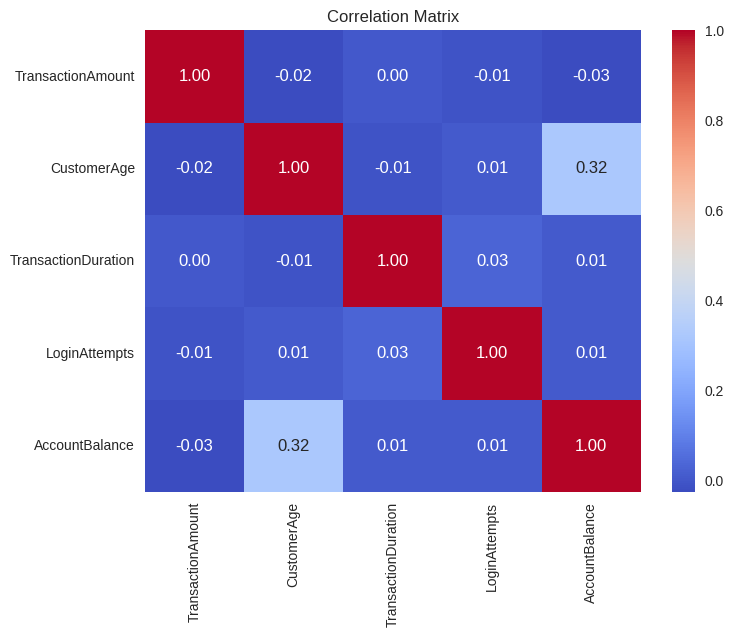

In [135]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
df_numerik = df[["TransactionAmount","CustomerAge", "TransactionDuration", "LoginAttempts",	"AccountBalance"]].copy()
plt.figure(figsize=(8, 6))
sns.heatmap(df_numerik.corr(), fmt=".2f", cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")

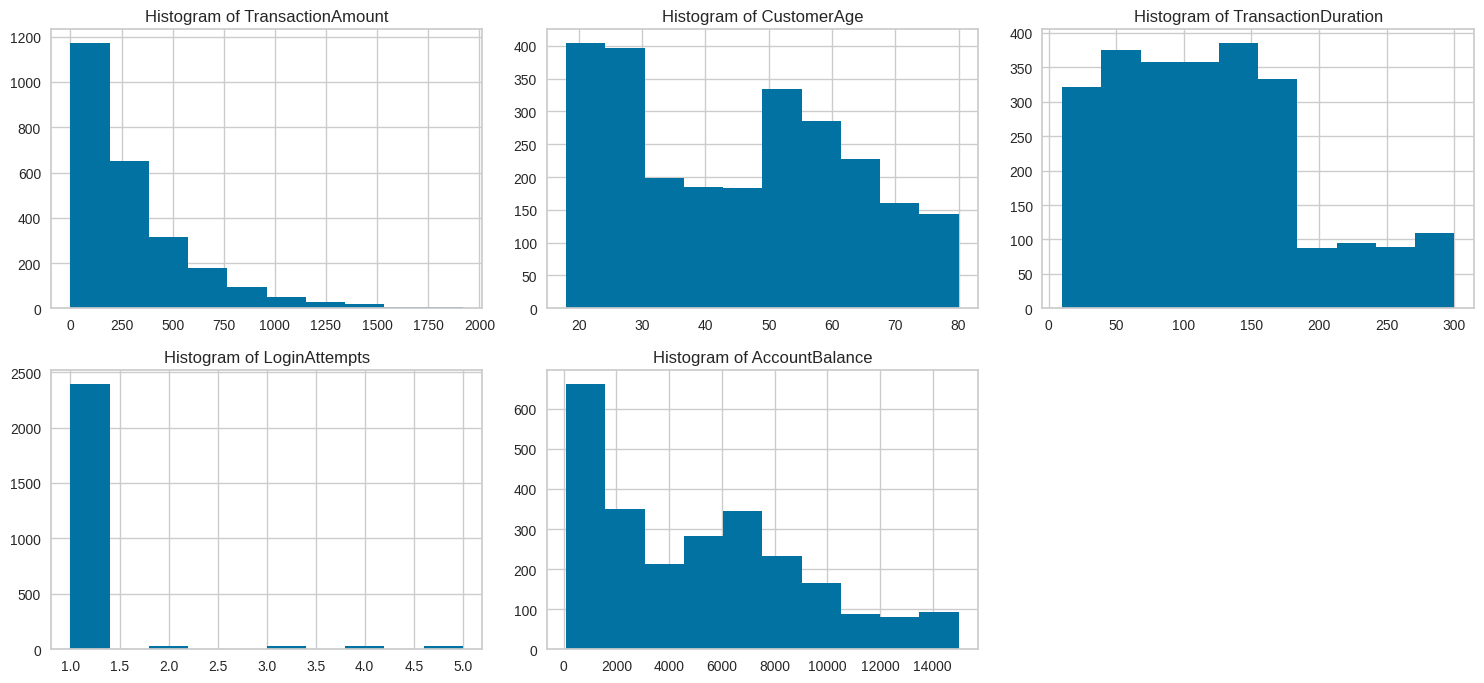

In [136]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(15, 7))
post = 1
for label, content in df_numerik.items():
  plt.subplot(2, 3, post)
  plt.hist(content)
  plt.title(f"Histogram of {label}")
  post += 1

plt.tight_layout()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

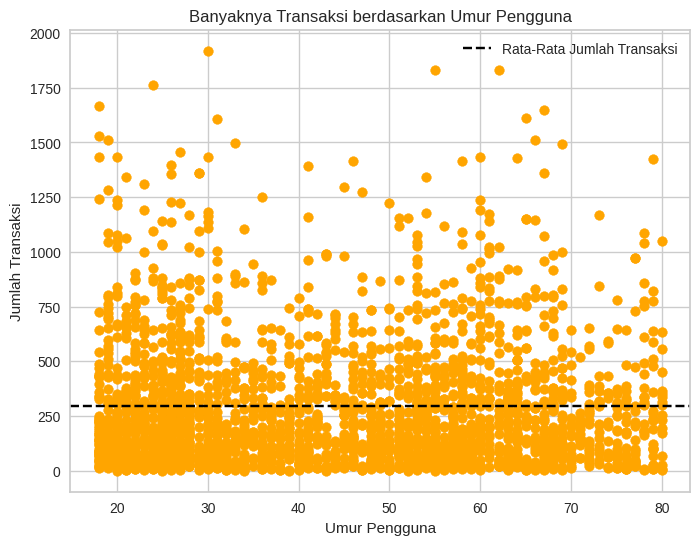

In [137]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(8, 6))
plt.scatter(df['CustomerAge'], df['TransactionAmount'], c="orange")
plt.xlabel("Umur Pengguna")
plt.ylabel("Jumlah Transaksi")
plt.title("Banyaknya Transaksi berdasarkan Umur Pengguna")
plt.axhline(df_numerik['TransactionAmount'].mean(), linestyle='--', color="black" ,label="Rata-Rata Jumlah Transaksi")
plt.legend()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [138]:
# Mengecek dataset menggunakan isnull().sum()
(df.isnull().sum())

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [139]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [140]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
std = StandardScaler()
df_numerik_scaled = std.fit_transform(df_numerik)
df_numerik_scaled = pd.DataFrame(df_numerik_scaled, columns=df_numerik.columns)
df_numerik_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [141]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal
df_kategorikal = df[['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']].copy()
labels = []
encoders = {}

for label, content in df_kategorikal.items():
  labels.append(label)
  encoder = LabelEncoder()
  df_kategorikal[label+"_enc"] = encoder.fit_transform(content)
  encoders[label] = encoder

df_kategorikal = df_kategorikal.drop(labels, axis=1)

df_kategorikal

,TransactionID_enc,AccountID_enc,TransactionType_enc,Location_enc,DeviceID_enc,IP Address_enc,MerchantID_enc,Channel_enc,CustomerOccupation_enc
0,0,126,1,36,365,186,14,0,0
1,1,450,1,15,50,82,51,0,0
2,2,18,1,23,229,342,8,2,3
3,3,68,1,33,182,300,1,2,3
4,4,406,0,1,298,500,90,2,3
...,...,...,...,...,...,...,...,...,...
2532,1035,469,1,2,44,579,5,2,2
2533,1469,196,1,34,223,211,21,2,0
2534,196,353,1,7,226,401,21,1,2
2535,587,55,0,40,363,587,78,1,3


In [142]:
# Melakukan drop pada kolom yang memiliki keterangan id
df_kategorikal = df_kategorikal.drop(["TransactionID_enc", "AccountID_enc", "DeviceID_enc", "MerchantID_enc", "IP Address_enc"], axis=1)
df_kategorikal.head()

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc
0,1,36,0,0
1,1,15,0,0
2,1,23,2,3
3,1,33,2,3
4,0,1,2,3


In [143]:
df_kategorikal.isnull().sum(), (df_kategorikal == '').sum()

(TransactionType_enc       0
 Location_enc              0
 Channel_enc               0
 CustomerOccupation_enc    0
 dtype: int64,
 TransactionType_enc       0
 Location_enc              0
 Channel_enc               0
 CustomerOccupation_enc    0
 dtype: int64)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [144]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_new = pd.concat([df_kategorikal, df_numerik_scaled], axis=1)
df_new = df_new.dropna(axis=0)
df_new

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,1,36,0,0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,1,15,0,0,0.268963,1.307715,0.307960,-0.204629,2.218381
2,1,23,2,3,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,1,33,2,3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
5,1,28,0,3,-0.703375,-1.495947,0.750409,-0.204629,-1.111505
...,...,...,...,...,...,...,...,...,...
2532,1,2,2,2,-0.231290,1.924521,0.065326,-0.204629,-0.166103
2533,1,34,2,0,0.903315,1.139496,-1.376201,-0.204629,1.702613
2534,1,7,1,2,0.668967,0.466617,1.663852,-0.204629,0.595184
2535,0,40,1,3,-0.338966,-0.991288,-0.505576,-0.204629,-1.005175


In [145]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_new = df_new.drop_duplicates()
df_new

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,1,36,0,0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,1,15,0,0,0.268963,1.307715,0.307960,-0.204629,2.218381
2,1,23,2,3,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,1,33,2,3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
5,1,28,0,3,-0.703375,-1.495947,0.750409,-0.204629,-1.111505
...,...,...,...,...,...,...,...,...,...
2509,1,36,1,2,-0.920781,0.634836,0.379322,-0.204629,-0.444044
2510,1,10,2,3,-0.382263,-1.215581,-1.433292,-0.204629,-0.856135
2511,0,17,2,3,-0.186796,-1.159507,-0.377123,-0.204629,-1.278402
2523,1,27,1,2,-0.977083,1.756301,-0.605484,-0.204629,-0.052396


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [146]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)

iqr = q3 - q1

batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

df_new = df_new[(df_new >= batas_bawah) & (df_new <= batas_atas)]
df_new = df_new.dropna(axis=0)
df_new

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,1.0,36,0,0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,1.0,15,0,0,0.268963,1.307715,0.307960,-0.204629,2.218381
2,1.0,23,2,3,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,1.0,33,2,3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
5,1.0,28,0,3,-0.703375,-1.495947,0.750409,-0.204629,-1.111505
...,...,...,...,...,...,...,...,...,...
2508,1.0,40,1,0,-0.157840,0.186250,0.821772,-0.204629,-1.246713
2509,1.0,36,1,2,-0.920781,0.634836,0.379322,-0.204629,-0.444044
2510,1.0,10,2,3,-0.382263,-1.215581,-1.433292,-0.204629,-0.856135
2523,1.0,27,1,2,-0.977083,1.756301,-0.605484,-0.204629,-0.052396


In [147]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
bins = [-float("inf"), -0.5, 0.5, float("inf")]
labels = ["muda", "paruh baya", "tua"]

df_new["kategori"] = pd.cut(df_new["CustomerAge"], bins=bins, labels=labels)
dummies = pd.get_dummies(df_new["kategori"], dtype=int)
df_new = df_new.join(dummies)
df_new = df_new.drop("kategori", axis=1)
df_new.head()

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,muda,paruh baya,tua
0,1.0,36,0,0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,0,0,1
1,1.0,15,0,0,0.268963,1.307715,0.307960,-0.204629,2.218381,0,0,1
2,1.0,23,2,3,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,0,0
3,1.0,33,2,3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,1,0,0
5,1.0,28,0,3,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,1,0,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [148]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_new.describe()

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,muda,paruh baya,tua
count,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1662.000000,1662.000000,1662.000000,1662.000000
mean,1.0,21.375451,0.925993,1.531889,-0.155869,-0.019284,-0.005530,-2.046294e-01,-0.011096,0.389290,0.249699,0.361011
std,0.0,12.405785,0.842110,1.154999,0.732855,0.995828,1.010158,3.637075e-15,0.986914,0.487736,0.432969,0.480438
min,1.0,0.000000,0.000000,0.000000,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000,0.000000
25%,1.0,11.000000,0.000000,0.000000,-0.753645,-0.991288,-0.833844,-2.046294e-01,-0.936142,0.000000,0.000000,0.000000
50%,1.0,21.000000,1.000000,2.000000,-0.355874,-0.038043,-0.113081,-2.046294e-01,-0.102401,0.000000,0.000000,0.000000
75%,1.0,32.000000,2.000000,3.000000,0.251850,0.803056,0.621956,-2.046294e-01,0.643057,1.000000,0.000000,1.000000
max,1.0,43.000000,3.000000,4.000000,2.072523,1.980594,2.577295,-2.046294e-01,2.531190,1.000000,1.000000,1.000000


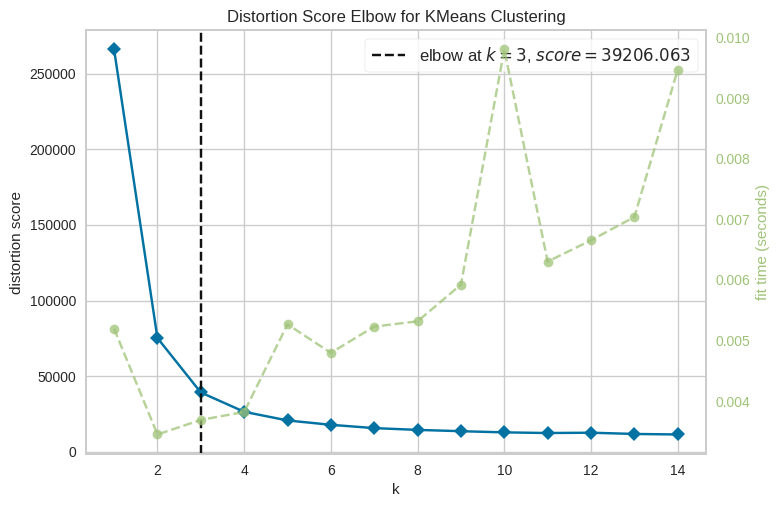

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmean = KMeans()
kelbow = KElbowVisualizer(kmean, k=(1, 15))
kelbow.fit(df_new)
kelbow.show()

In [150]:
# Menggunakan algoritma K-Means Clustering
nilai_k = kelbow.elbow_value_
kmean = KMeans(n_clusters=nilai_k, random_state=42, n_init=10)
kmean.fit(df_new)

KMeans(n_clusters=np.int64(3), n_init=10, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [151]:
# Menyimpan model menggunakan joblib
joblib.dump(kmean, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [152]:
# Menghitung dan menampilkan nilai Silhouette Score.
labels = kmean.fit_predict(df_new)
skor = silhouette_score(df_new, labels)
print(f"Skor Silhouette dari Model KMean adalah : {skor}")

Skor Silhouette dari Model KMean adalah : 0.5043891108643708


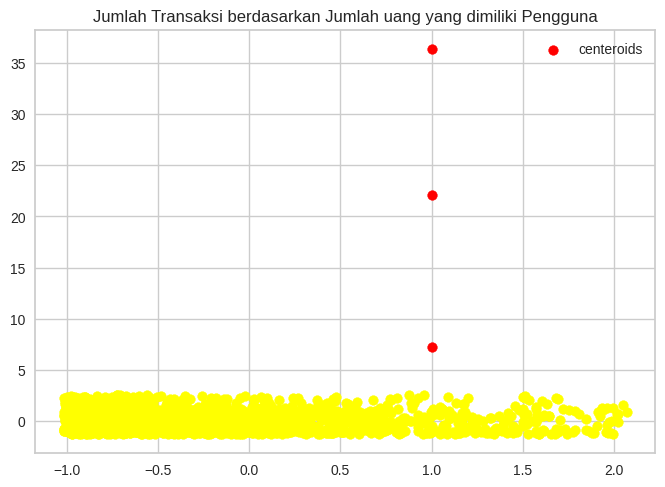

In [153]:
# Membuat visualisasi hasil clustering
plt.scatter(df_new.iloc[:, 4], df_new.iloc[:, 8], c="yellow")
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c="red", label="centeroids")
plt.title("Jumlah Transaksi berdasarkan Jumlah uang yang dimiliki Pengguna")
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

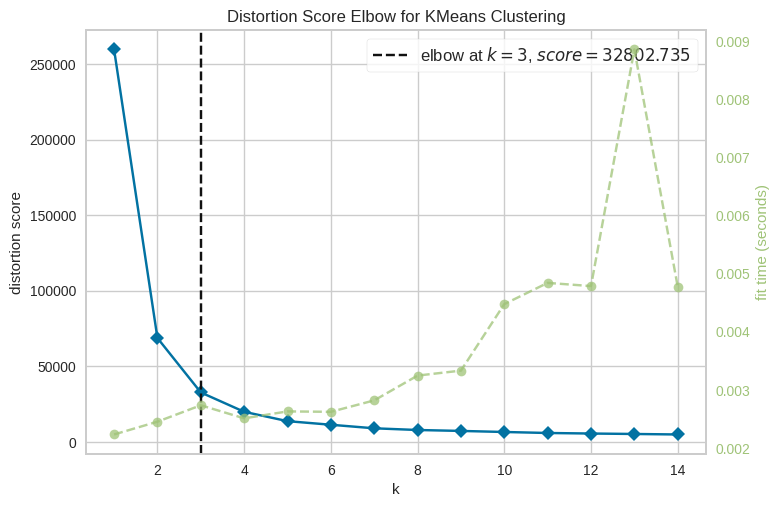

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [154]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_new)

pca_kelbow_kmean = KMeans()
kelbow = KElbowVisualizer(pca_kelbow_kmean, k=(1, 15))
kelbow.fit(data_pca)
kelbow.show()

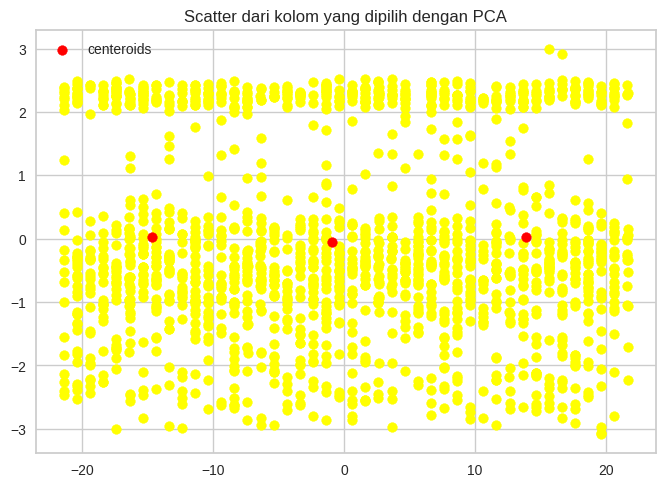

In [155]:
nilai_k = kelbow.elbow_value_
pca_kmean = KMeans(n_clusters=nilai_k, random_state=42)
pca_kmean.fit(data_pca)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c="yellow")
plt.scatter(pca_kmean.cluster_centers_[:, 0], pca_kmean.cluster_centers_[:, 1], c="red", label="centeroids")
plt.title("Scatter dari kolom yang dipilih dengan PCA")
plt.legend()
plt.show()

In [156]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(pca_kmean, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [157]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

df_new['clusters'] = pca_kmean.fit_predict(data_pca)
df_new.head()

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,muda,paruh baya,tua,clusters
0,1.0,36,0,0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,0,0,1,0
1,1.0,15,0,0,0.268963,1.307715,0.307960,-0.204629,2.218381,0,0,1,2
2,1.0,23,2,3,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,0,0,2
3,1.0,33,2,3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,1,0,0,0
5,1.0,28,0,3,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,1,0,0,0


In [158]:
num_columns = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
df_num_agg = pd.DataFrame({
    "TransactionAmount" : df_new["TransactionAmount"],
    "CustomerAge" : df_new["CustomerAge"],
    "TransactionDuration" : df_new["TransactionDuration"],
    "LoginAttempts" : df_new["LoginAttempts"],
    "AccountBalance" : df_new["AccountBalance"],
    "Clusters" : df_new["clusters"]
})

for i, name in enumerate(num_columns):
  print(name)
  df_grouped = df_num_agg.groupby('Clusters')[num_columns[i]].agg(['max', 'min', 'mean'])
  print(df_grouped)
  print(45*"=")

TransactionAmount
               max       min      mean
Clusters                              
0         2.023990 -1.017881 -0.159333
1         2.072523 -1.017676 -0.160726
2         1.985656 -1.017231 -0.147451
CustomerAge
               max       min      mean
Clusters                              
0         1.980594 -1.495947 -0.072425
1         1.980594 -1.495947 -0.013858
2         1.980594 -1.495947  0.033127
TransactionDuration
               max       min      mean
Clusters                              
0         2.563023 -1.547472 -0.032002
1         2.577295 -1.561745 -0.011756
2         2.563023 -1.561745  0.029148
LoginAttempts
               max       min      mean
Clusters                              
0        -0.204629 -0.204629 -0.204629
1        -0.204629 -0.204629 -0.204629
2        -0.204629 -0.204629 -0.204629
AccountBalance
               max       min      mean
Clusters                              
0         2.531190 -1.286100 -0.004354
1         2.522155 -1.28

In [159]:
encoders

{'TransactionID': LabelEncoder(),
 'AccountID': LabelEncoder(),
 'TransactionType': LabelEncoder(),
 'Location': LabelEncoder(),
 'DeviceID': LabelEncoder(),
 'IP Address': LabelEncoder(),
 'MerchantID': LabelEncoder(),
 'Channel': LabelEncoder(),
 'CustomerOccupation': LabelEncoder()}

In [160]:
cat_columns = ["TransactionType", "Location", "Channel", "CustomerOccupation"]
categories = {}
for name, encoder in encoders.items():
  if name in cat_columns:
    categories[name] = encoder.classes_

categories

{'TransactionType': array(['Credit', 'Debit', nan], dtype=object),
 'Location': array(['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Boston',
        'Charlotte', 'Chicago', 'Colorado Springs', 'Columbus', 'Dallas',
        'Denver', 'Detroit', 'El Paso', 'Fort Worth', 'Fresno', 'Houston',
        'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas',
        'Los Angeles', 'Louisville', 'Memphis', 'Mesa', 'Miami',
        'Milwaukee', 'Nashville', 'New York', 'Oklahoma City', 'Omaha',
        'Philadelphia', 'Phoenix', 'Portland', 'Raleigh', 'Sacramento',
        'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle',
        'Tucson', 'Virginia Beach', 'Washington', nan], dtype=object),
 'Channel': array(['ATM', 'Branch', 'Online', nan], dtype=object),
 'CustomerOccupation': array(['Doctor', 'Engineer', 'Retired', 'Student', nan], dtype=object)}

In [161]:
categories['Location'][20]

'Los Angeles'

In [162]:
df_cate_modes = df_new.groupby('clusters')[["TransactionType_enc", "Location_enc", "Channel_enc", "CustomerOccupation_enc"]].apply(lambda x: x.mode().iloc[0])
df_cate_modes

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc
clusters,,,,
0,1.0,40.0,0.0,3.0
1,1.0,5.0,0.0,3.0
2,1.0,20.0,0.0,1.0


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1:** klaster 1 didapatkan dari kebanyakan pelajar di Tucson yang sudah memiliki kartu Debit dan sering melakukan pembayaran dengan melalui ATM sedangkan untuk jumlah transasksinya di klaster ini maksimal diangka 2.023990(setelah discale), minimum diangka -1.017881(setelah discale) dan untuk rata-ratanya -0.159333(setelah discale). Untuk umur di klaster ini tertinggi ada diangka 1.980594(setelah discale), untuk umur termudanya ada diangka -1.495947(setelah discale), sedangkan untuk rata-ratanya adalah -0.072425(setelah discale). Di klaster ini sendiri memiliki lama waktu untuk transaksi, untuk terlama ada diangka 2.563023(setelah discale), untuk tercepat ada diangka -1.547472(setelah discale), dan untuk rata-ratanya ada diangka -0.032002(setelah discale). Di klaster ini juga memiliki riwayat upaya percobaan login ke akun perbankan berikut banyak upaya yang telah dilakukan, maksimal berada diangka -0.204629(setelah discale), minimum ada diangka -0.204629(setelah discale), dan untuk rata-ratanya -0.204629(setelah discale). Orang-orang di klaster ini juga memiliki saldo agar dapat melakukan transaksi, saldo yang terbanyak diantara  saldo yang terdapat di klaster ini berada diangka 2.531190(setelah discale), untuk yang paling sedikit berada di -1.286100(setelah discale), dan untuk rata-ratanya -0.004354(setelah discale)

2. **Cluster 2:** klaster 2 didapatkan dari kebanyakan pelajar di Charlotte yang sudah memiliki kartu Debit dan sering melakukan pembayaran dengan melalui ATM sedangkan untuk jumlah transasksinya di klaster ini maksimal diangka 2.072523(setelah discale), minimum diangka -1.017676(setelah discale) dan untuk rata-ratanya -0.160726(setelah discale). Untuk umur di klaster ini tertinggi ada diangka 1.980594(setelah discale), untuk umur termudanya ada diangka -1.495947(setelah discale), sedangkan untuk rata-ratanya adalah -0.013858(setelah discale). Di klaster ini sendiri memiliki lama waktu untuk transaksi, untuk terlama ada diangka 2.577295(setelah discale), untuk tercepat ada diangka -1.561745(setelah discale), dan untuk rata-ratanya ada diangka -0.011756(setelah discale). Di klaster ini juga memiliki riwayat upaya percobaan login ke akun perbankan berikut banyak upaya yang telah dilakukan, maksimal berada diangka -0.204629(setelah discale), minimum ada diangka -0.204629(setelah discale), dan untuk rata-ratanya -0.204629(setelah discale). Orang-orang di klaster ini juga memiliki saldo agar dapat melakukan transaksi, saldo yang terbanyak diantara  saldo yang terdapat di klaster ini berada diangka 2.522155(setelah discale), untuk yang paling sedikit berada di -1.281807(setelah discale), dan untuk rata-ratanya -0.035527(setelah discale).

3. **Cluster 3:** klaster 3 didapatkan dari kebanyakan Engineer di Los Angeles yang sudah memiliki kartu Debit dan sering melakukan pembayaran dengan melalui ATM sedangkan untuk jumlah transasksinya di klaster ini maksimal diangka 1.985656(setelah discale), minimum diangka -1.017231(setelah discale) dan untuk rata-ratanya -0.147451(setelah discale). Untuk umur di klaster ini tertinggi ada diangka 1.980594(setelah discale), untuk umur termudanya ada diangka -1.495947(setelah discale), sedangkan untuk rata-ratanya adalah 0.033127(setelah discale). Di klaster ini sendiri memiliki lama waktu untuk transaksi, untuk terlama ada diangka 2.563023(setelah discale), untuk tercepat ada diangka -1.561745(setelah discale), dan untuk rata-ratanya ada diangka 0.029148(setelah discale). Di klaster ini juga memiliki riwayat upaya percobaan login ke akun perbankan berikut banyak upaya yang telah dilakukan, maksimal berada diangka -0.204629(setelah discale), minimum ada diangka -0.204629(setelah discale), dan untuk rata-ratanya -0.204629(setelah discale). Orang-orang di klaster ini juga memiliki saldo agar dapat melakukan transaksi, saldo yang terbanyak diantara  saldo yang terdapat di klaster ini berada diangka 2.453714(setelah discale), untuk yang paling sedikit berada di -1.283147(setelah discale), dan untuk rata-ratanya 0.005041(setelah discale)


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [163]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_new = df_new.rename(columns={'clusters' : 'Target'})
df_new.head()

,TransactionType_enc,Location_enc,Channel_enc,CustomerOccupation_enc,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,muda,paruh baya,tua,Target
0,1.0,36,0,0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,0,0,1,0
1,1.0,15,0,0,0.268963,1.307715,0.307960,-0.204629,2.218381,0,0,1,2
2,1.0,23,2,3,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,0,0,2
3,1.0,33,2,3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,1,0,0,0
5,1.0,28,0,3,-0.703375,-1.495947,0.750409,-0.204629,-1.111505,1,0,0,0


In [164]:
# Simpan Data
df_new.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [165]:
# inverse dataset ke rentang normal
# data numerik
numerik = df_new[["TransactionAmount",	"CustomerAge", "TransactionDuration",	"LoginAttempts",	"AccountBalance"]].copy()
numerik = std.inverse_transform(numerik)
numerik = pd.DataFrame(numerik, columns=["TransactionAmount",	"CustomerAge", "TransactionDuration",	"LoginAttempts",	"AccountBalance"])
numerik.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70.0,81.0,1.0,5112.21
1,376.24,68.0,141.0,1.0,13758.91
2,126.29,19.0,56.0,1.0,1122.35
3,184.50,26.0,25.0,1.0,8569.06
4,92.15,18.0,172.0,1.0,781.68


In [166]:
# data kategorik
kategorik = df_new[["TransactionType_enc",	"Location_enc",	"Channel_enc",	"CustomerOccupation_enc"]].copy()
age = df_new[["muda", "paruh baya", "tua"]]

for col in ["TransactionType",	"Location",	"Channel",	"CustomerOccupation"]:
  kategorik[col] = encoders[col].inverse_transform(kategorik[col+"_enc"].astype(int))


df_kategorik_inverse = kategorik.drop(["TransactionType_enc",	"Location_enc",	"Channel_enc",	"CustomerOccupation_enc"], axis=1)
df_kategorik_inverse = pd.concat([df_kategorik_inverse, age], axis=1)
df_kategorik_inverse.head()

,TransactionType,Location,Channel,CustomerOccupation,muda,paruh baya,tua
0,Debit,San Diego,ATM,Doctor,0,0,1
1,Debit,Houston,ATM,Doctor,0,0,1
2,Debit,Mesa,Online,Student,1,0,0
3,Debit,Raleigh,Online,Student,1,0,0
5,Debit,Oklahoma City,ATM,Student,1,0,0


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Umur Pelanggan dengan jumlah transaksi yang dilakukannya)**:
  - **Rata-rata (mean) TransactionAmount:** 251.103767 (-0.159333)
  - **Rata-rata (mean) AccountBalance:** 5096.469848 (-0.004354)
  - **Analisis:** Pada cluster ini rata-rata dari jumlah transaksi adalah 251.103767 yang dimana ini adalah angka yang cukup tinggi walaupun begitu, jumlah saldo yang dimiliki oleh pelanggan 20x lipat dari rata-rata pengeluarannya dengan begitu pemilik toko dapat mempertimbangkan menaikkan harga barang tanpa perlu takut kehilangan pelanggan dikarenakan inflasi.

2. **Cluster 2: (Umur Pelanggan dengan jumlah transaksi yang dilakukannya)**:
  - **Rata-rata (mean) TransactionAmount:** 250.696908 (-0.160726)
  - **Rata-rata (mean) AccountBalance:** 4974.982576 (-0.035527)
  - **Analisis:** Pada cluster ini rata-rata dari jumlah transaksi adalah 250.696908 angka ini masih termasuk angka yang cukup tinggi walaupun rata-rata dari jumlah saldo yang dimiliki pelanggan tidak mencapai 20x lipat seperti cluster sebelumnya tetapi, ketika pemilik toko ingin menaikkan harga barang, ini masih akan baik-baik saja dan tidak mengganggu atau mengurangi penjualan.

3. **Cluster 3: (Umur Pelanggan dengan jumlah transaksi yang dilakukannya)**:
  - **Rata-rata (mean) TransactionAmount:** 254.575348 (-0.147451)
  - **Rata-rata (mean) AccountBalance:** 5133.085000 (0.005041)
  - **Analisis:** Pada cluster ini terlihat jelas bahwa rata-rata jumlah transaksi diangka 254.575348 yang dimana ini adalah rata-rata dengan nilai tertinggi dan juga bersamaan dengan saldo yang dimiliki pelanggan sebesar 5133.085000 yang dimana lebih dari 20x lipat dari jumlah rata-rata transaksi dan dengan begitu pemilik toko dapat merekomendasikan atau menawarkan barang yang berkualitas dan memiliki harga diatas rata-rata produk lainnya.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [167]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
target_col = df_new['Target']
df_integrate_inverse = pd.concat([df_kategorik_inverse.reset_index(drop=True),
                                  numerik.reset_index(drop=True),
                                  target_col.reset_index(drop=True)], axis=1)
df_integrate_inverse.head()

,TransactionType,Location,Channel,CustomerOccupation,muda,paruh baya,tua,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,Debit,San Diego,ATM,Doctor,0,0,1,14.09,70.0,81.0,1.0,5112.21,0
1,Debit,Houston,ATM,Doctor,0,0,1,376.24,68.0,141.0,1.0,13758.91,2
2,Debit,Mesa,Online,Student,1,0,0,126.29,19.0,56.0,1.0,1122.35,2
3,Debit,Raleigh,Online,Student,1,0,0,184.50,26.0,25.0,1.0,8569.06,0
4,Debit,Oklahoma City,ATM,Student,1,0,0,92.15,18.0,172.0,1.0,781.68,0


In [168]:
# Simpan Data
df_integrate_inverse.to_csv('data_clustering_inverse.csv', index=False)